In [22]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import pickle
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# The data in the col unnamed is very less so we can remove theis columns

In [13]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [14]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# we can rename the columns in the dataset
## for more understanding

In [15]:
data.rename(columns={'v1':'target','v2':'text'},inplace = True)
data.sample(5)

,target,text
22,ham,So Ì_ pay first lar... Then when is da stock c...
2154,ham,Oh god i am happy to see your message after 3 ...
789,ham,Gud mrng dear hav a nice day
327,ham,"I'd say that's a good sign but, well, you know..."
1469,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...


## Encoding the target data

In [23]:
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [25]:
data.sample(5)

,target,text
2420,0,Oic... Then better quickly go bathe n settle d...
706,0,So when do you wanna gym harri
708,1,To review and KEEP the fantastic Nokia N-Gage ...
3916,0,Eh ur laptop got no stock lei... He say mon mu...
3847,0,Can you plz tell me the ans. BSLVYL sent via f...


# Find the null values in data

In [26]:
data.isnull().sum()

target    0
text      0
dtype: int64

# Find the duplicate data present into dataset

In [28]:
data.duplicated().sum()

403

In [29]:
data = data.drop_duplicates(keep='first')

In [31]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

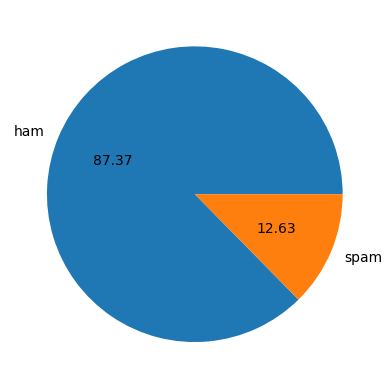

In [32]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [33]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     pansare\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     pansare\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
data['num_of_character'] = data['text'].apply(len)

C:\Users\Aditya pansare\AppData\Local\Temp\ipykernel_5020\625269508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_of_character'] = data['text'].apply(len)


In [37]:
data['num_word'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Aditya pansare\AppData\Local\Temp\ipykernel_5020\1202449607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_word'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [38]:
data['num_sentence'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Aditya pansare\AppData\Local\Temp\ipykernel_5020\4152642506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentence'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [39]:
data[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
data[data['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
data[data['target'] == 1][['num_of_character','num_word','num_sentence']].describe() 

,num_of_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


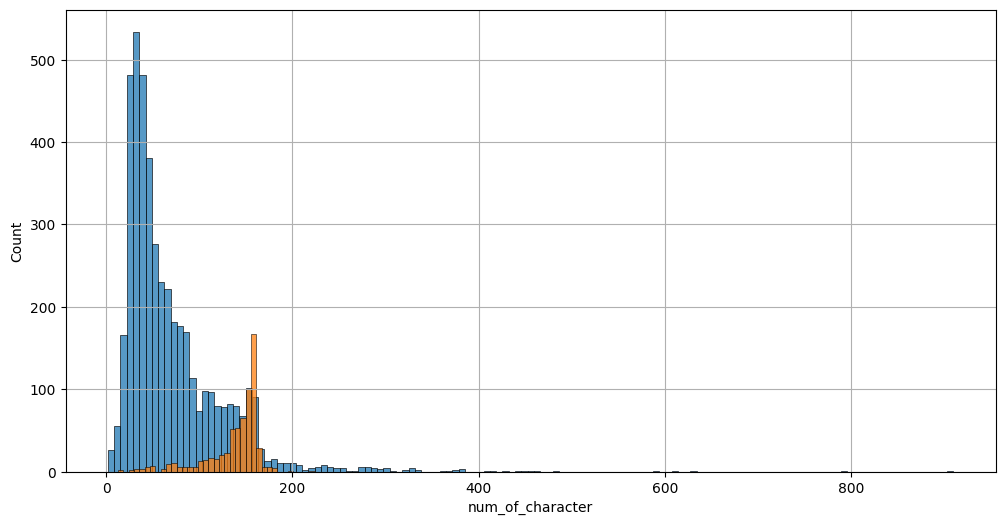

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_of_character'])
sns.histplot(data[data['target'] == 1]['num_of_character'])
plt.grid()

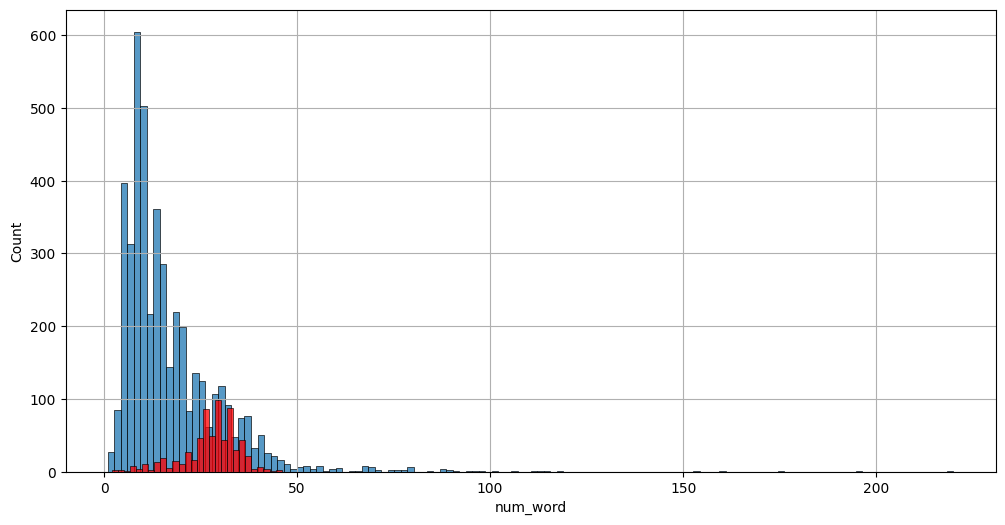

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_word'])
sns.histplot(data[data['target'] == 1]['num_word'],color='red')
plt.grid()

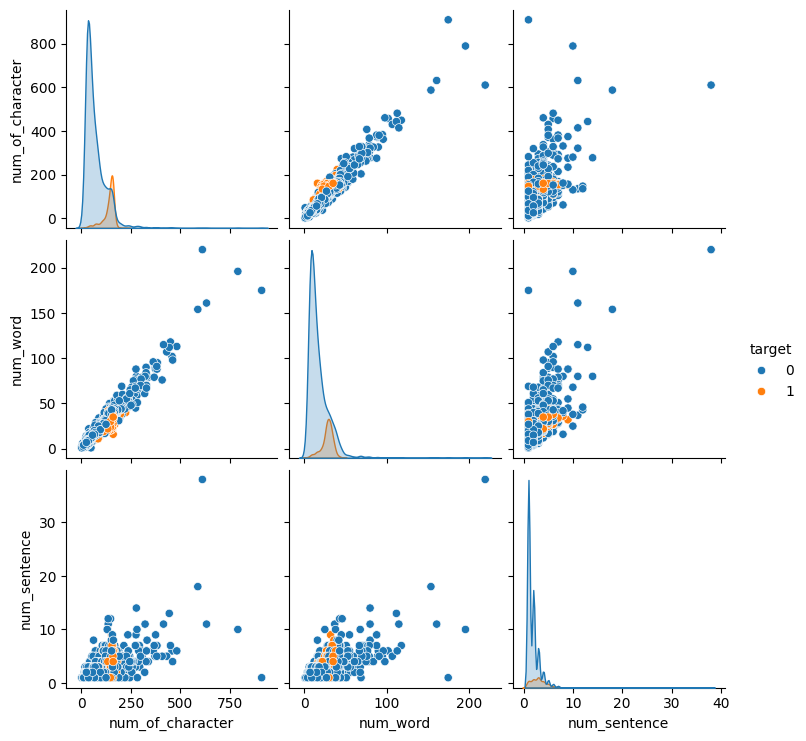

In [47]:
sns.pairplot(data,hue='target')
plt.grid()

<Axes: >

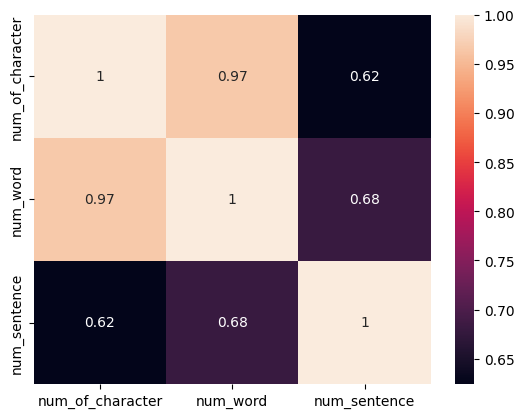

In [49]:
sns.heatmap(data[['num_of_character','num_word','num_sentence']].corr(),annot=True)

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
         y.append(ps.stem(i))
    
    return " ".join(y)
    

In [54]:
data['text'][18]

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

In [55]:
transform_text("Fine if thatåÕs the way u feel. ThatåÕs the way its gota b")

'fine thatåõ way u feel thatåõ way gota b'

In [57]:
data['transformed_text'] = data['text'].apply(transform_text)

C:\Users\Aditya pansare\AppData\Local\Temp\ipykernel_5020\2902741962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [59]:
data.head(5)

,target,text,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [61]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))


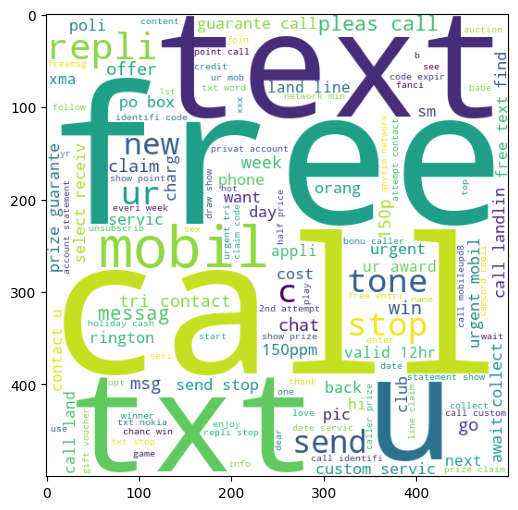

In [62]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [64]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))


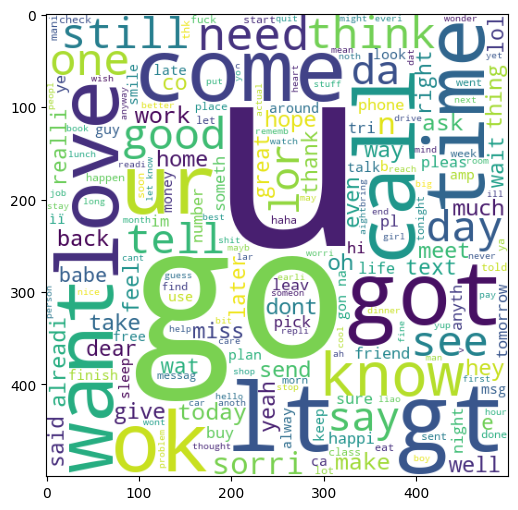

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [66]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [68]:
x = tfidf.fit_transform(data['transformed_text']).toarray()


In [69]:
x.shape

(5169, 4000)

In [71]:
y = data['target'].values

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()
lg = LogisticRegression()
svm = SVC()

In [74]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
0.5020746887966805


In [75]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
1.0


In [76]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
0.9767441860465116


In [77]:
lg.fit(x_train,y_train)
y_pred4 = lg.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9448742746615088
0.968421052631579


In [78]:
svm.fit(x_train,y_train)
y_pred5 = svm.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.960348162475822
0.981651376146789


In [79]:
pickle.dump(tfidf,open('nlp_vectorizer1.pkl','wb'))
pickle.dump(mnb,open('nlp_model1.pkl','wb'))

# Testing

In [80]:
pred = bnb.predict(x_test)

In [81]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
y_test


array([0, 0, 1, ..., 0, 0, 0])

# Accuracy

In [84]:
accuracy_score(pred,y_test)

0.9777562862669246